# Loan Prediction III - Analytics Vidhya
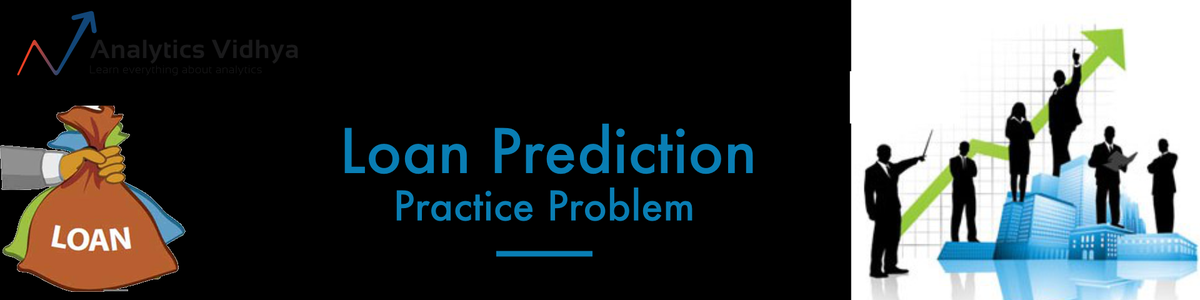

### Competition URL: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

## Problem Statement
 Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. 
 Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem:
 Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online 
  application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, 
  Credit History and others. To automate this process, they have given a problem to identify the customers segments, 
  those are eligible for loan amount so that they can specifically target these customers. 
  Here they have provided a partial data set

In [1]:
# First let's import the libraries we'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data loading and overview

In [2]:
# Load train data set and take a quick look at it
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
# Checking the number of rows and columns in this dataset (614 rows, 13 columns)
train.shape, test.shape

((614, 13), (367, 12))

There are only 614 samples in the training data set, which can probably be a challenge for us to train models.

Let's now explore each column one by one.



Let's also give each variable a brief definition and explore their data types:

**Loan_ID**: Unique Loan ID

**Gender**: Applicant's gender: Male / Female

**Married**: Is the applicant married? (Y/N) -> Yes / No

**Dependents**: Number of dependents the applicant has

**Education**: Applicant's education (Graduate / Under Graduate)

**Self_Employed**: Is the applicant self-employed? (Y/N) -> Yes / No

**ApplicantIncome**: Applicant's income _monthly_.
 The currency is not given by Analytics Vidhya as it is irrelevant. But let's assume the values are in US Dollars ($)

**CoapplicantIncome**: Coapplicant's income _monthly_ (in US Dollars $)

**LoanAmount**: Loan amount _in thousands_ (**OBS:** In **thousands** of US Dollars $)

**Loan_Amount_Term**: Term of loan _in months_
  A term loan is a loan from a bank for a specific amount that has a specified repayment schedule and either a fixed or floating interest rate. A term loan is often appropriate for an established small business with sound financial statements and the ability to make a substantial down payment to minimize payment amounts and the total cost of the loan. (Read more at [Investopedia](https://www.investopedia.com/terms/t/termloan.asp))

**Credit_History**: Does credit history meet guidelines? (1.0/0.0) -> Yes / No

**Property_Area**: Category of the property area based on its location: Urban / Semi Urban / Rural

**Loan_Status**: Was the loan approved (Y/N) -> Yes / No
  This is the variable we are trying to predict in this competition.

In [4]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can also see the number of rows that have NA values for each column

In [5]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 As we can see, we have information about all applicants' education status, income (and their coapplicants), and property area (urban/ semi urban / rural).
 Curiosly, 22 applicants did not specify the loan amount they desire.
 Besides, 50 applicants out of 614 do not have credit history information, which can be a problem for us to decide if they meet the guideline to get a loan or not.

## Handling Missing Values

### SimpleImputer

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#IterativeImputer().fit_transform(train)

# Save the variable names
train_variables = train.columns.values

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent") # Inputs the most frequent value of each column
imp = imp.fit_transform(train)
imp[1]
train = pd.DataFrame.from_records(imp)

train.columns = train_variables

train.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


## **OBS:** 

 Because the dataset does not provide us with information from many clients, I decided not to exclude any of them from our analysis. That is, no rows will be deleted from the dataset.

 For handling the missing values, the method of imputing the most frequent value of each variable (its mode) **did not seem to disrupt the data** as most variables did not present a significant amount of missing values. Most of them had 0 occurrences whereas two of them had a higher amount ('Self_Employed' with about 5% of its values being null and 'Credit_History' with 8%).

 Some further analysis combined with visualisation techniques, which I chose not to include in this Notebook to not make it very extense, showed that the proportions of approved/denied applicants and their correlations to the variables in the dataset were barely affected, if at all changed.

## Analysing each variable

### Loan_ID

In [7]:
# The 'Loan_ID' column does not give us relevant information for predicting if a loan should be approved or not, so we can just drop it from both data sets.
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

Before we move on to the following variables listed in the order of the data frame columns, let's change a few details to make the data set more _concise_ and to produce better data visualisations.

First, from the Data description in the competition web page, the **LoanAmount** column's data is in _thousands_ of US Dollars, whereas those for **ApplicantIncome** and **CoapplicantIncome** are in US Dollars. We can change this by simply multiplying all the values in the LoanAmount column by 1,000.

In [8]:
train['LoanAmount'] = train['LoanAmount'].map(lambda x:x*1000)
test['LoanAmount'] = test['LoanAmount'].map(lambda x:x*1000);

A glimpse of the change made:

In [9]:
train.LoanAmount.head(10)

0    120000.0
1    128000.0
2     66000.0
3    120000.0
4    141000.0
5    267000.0
6     95000.0
7    158000.0
8    168000.0
9    349000.0
Name: LoanAmount, dtype: float64

Second, let's apply a log transformation to the following columns in both data sets: **LoanAmount**, **ApplicantIncome** and **CoapplicantIncome** as they are all right skewed, as seen in the plots below.

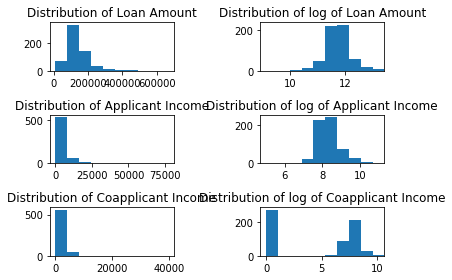

In [10]:
# 3 rows, 2 columns, 1st graph (and so on)...
plt.subplot(3, 2, 1)
plt.hist(train['LoanAmount'])
plt.xlim(right=train['LoanAmount'].max())
plt.title('Distribution of Loan Amount')

plt.subplot(3, 2, 2)
plt.hist(np.log1p(train['LoanAmount']))
plt.xlim(right=np.log1p(train['LoanAmount']).max())
plt.title('Distribution of log of Loan Amount')

plt.subplot(3, 2, 3)
plt.hist(train['ApplicantIncome'])
plt.xlim(right=train['ApplicantIncome'].max())
plt.title('Distribution of Applicant Income')

plt.subplot(3, 2, 4)
plt.hist(np.log1p(train['ApplicantIncome']))
plt.xlim(right=np.log1p(train['ApplicantIncome']).max())
plt.title('Distribution of log of Applicant Income')

plt.subplot(3, 2, 5)
plt.hist(train['CoapplicantIncome'])
plt.xlim(right=train['CoapplicantIncome'].max())
plt.title('Distribution of Coapplicant Income')


plt.subplot(3, 2, 6)
plt.hist(np.log1p(train['CoapplicantIncome']))
plt.xlim(right=np.log1p(train['CoapplicantIncome']).max())
plt.title('Distribution of log of Coapplicant Income')

plt.tight_layout()
plt.show()

The histogram for the distribution of log of Coapplicant Income is bimodal because the 'Coapplicant' variable has many inputs with the '0' value, which happens when there is not a coapplicant for that applicant.
We can also show how the distribution for this variable will look like after we apply a log transformation if we exclude the rows that contain a '0' value.
The transformation will work as expected, as the data will be approximated to normality.

Text(0.5, 1.0, 'Distribution of log of Coapplicant Income')

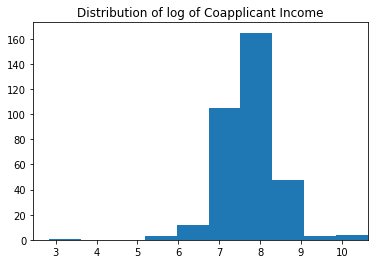

In [11]:
# Excludes all the rows that have a '0' value for the 'CoapplicantIncome' variable
coapplicant_without_zeros = train[train['CoapplicantIncome']!=0]

plt.hist(np.log1p(coapplicant_without_zeros['CoapplicantIncome']))
plt.xlim(right=np.log1p(coapplicant_without_zeros['CoapplicantIncome']).max())
plt.title('Distribution of log of Coapplicant Income')

For now, let's add the log-transformed variables to both data sets.

In [12]:
train['log_LoanAmount'] = np.log1p(train['LoanAmount'])
test['log_LoanAmount'] = np.log1p(test['LoanAmount'])
train['log_ApplicantIncome'] = np.log1p(train['ApplicantIncome'])
test['log_ApplicantIncome'] = np.log1p(test['ApplicantIncome'])
train['log_CoapplicantIncome'] = np.log1p(train['CoapplicantIncome'])
test['log_CoapplicantIncome'] = np.log1p(test['CoapplicantIncome'])

# Drop the non-transformed columns
train = train.drop(columns = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome'])
test = test.drop(columns = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome'])

### Gender

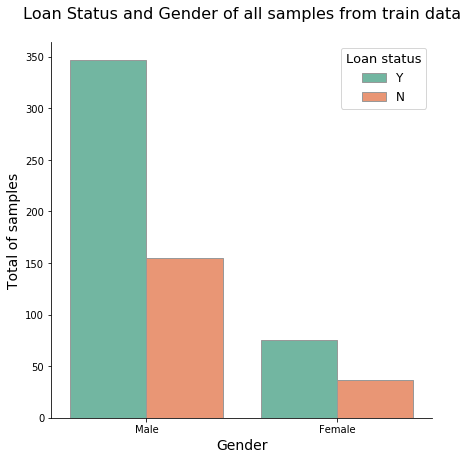

In [13]:
# Grouped barplot correlating Gender and Loan_Status

loan_status_gender_count = sns.catplot(x='Gender', hue='Loan_Status', kind="count",
                                            palette="Set2", edgecolor=".6", height=6,
                                            legend=False, data=train);

# Set the labels for the x and y axis, the legend and the title
plt.title("Loan Status and Gender of all samples from train data\n", fontsize=16)
loan_status_gender_count.set_xlabels('Gender', fontsize=14)
loan_status_gender_count.set_ylabels('Total of samples', fontsize=14)
plt.legend(title='Loan status', fontsize=12,title_fontsize=13)

In [14]:
male_approved = train[(train.Gender == 'Male') &  (train.Loan_Status == 'Y')]
male_denied = train[(train.Gender == 'Male') &  (train.Loan_Status == 'N')]
female_approved = train[(train.Gender == 'Female') &  (train.Loan_Status == 'Y')]
female_denied = train[(train.Gender == 'Female') &  (train.Loan_Status == 'N')]

male_rate = (len(male_approved.index) / (len(male_approved.index) + len(male_denied.index)))
female_rate = (len(female_approved.index) / (len(female_approved.index) + len(female_denied.index)))

print('The proportion of approved male applicants is %.2f and that of female applicants is %.2f' % (male_rate, female_rate))

The proportion of approved male applicants is 0.69 and that of female applicants is 0.67


Let's also check the proportion for the 13 applicants that did not specify their gender in the application

With the plot and the proportions presented above, we can see that the gender of an applicant alone does not seem to influence the company's decision to loan them money.

The scatterplot below also provides us with the same insight, but also gives us new important information:
  1. Applicants demand for a loan amount that is much greater than their incomes;
  2. There is a positive correlation between the loan amount requested by an applicant and their income for both genders.

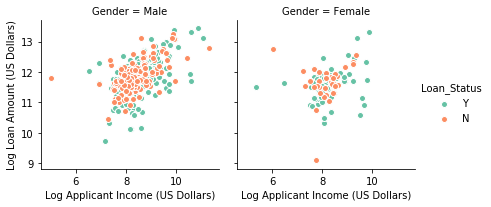

In [15]:
g = sns.FacetGrid(train, col="Gender", hue="Loan_Status", palette="Set2")
g = g.map(plt.scatter, "log_ApplicantIncome", "log_LoanAmount", edgecolor="w").add_legend()
g.set_axis_labels("Log Applicant Income (US Dollars)", "Log Loan Amount (US Dollars)")

With the plot and the proportions presented above, we can see that the gender of an applicant alone does not seem to influence the company's decision to loan them money.

### Married

  For this column we can do a similar analysis and data visualisation as the Gender one, as it only has two possible values       ('Yes' or 'No'), plus the 3 applicants that did not specify their marital status.

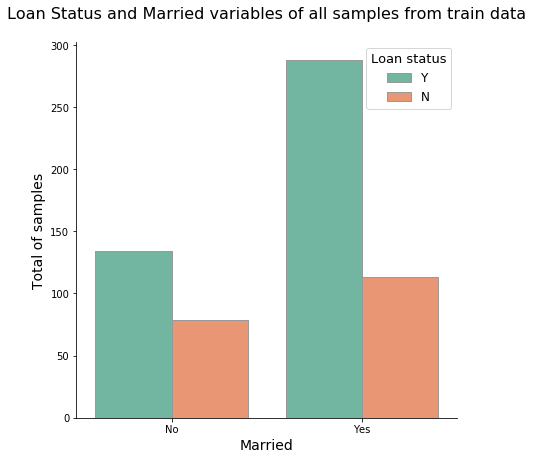

In [16]:
# Grouped barplot correlating Married and Loan_Status

loan_status_gender_count = sns.catplot(x='Married', hue='Loan_Status', kind="count",
                                            palette="Set2", edgecolor=".6", height=6,
                                            legend=False, data=train);

# Set the labels for the x and y axis, the legend and the title
plt.title("Loan Status and Married variables of all samples from train data\n", fontsize=16)
loan_status_gender_count.set_xlabels('Married', fontsize=14)
loan_status_gender_count.set_ylabels('Total of samples', fontsize=14)
plt.legend(title='Loan status', fontsize=12,title_fontsize=13)

In [17]:
married_approved = train[(train.Married == 'Yes') &  (train.Loan_Status == 'Y')]
married_denied = train[(train.Married == 'Yes') &  (train.Loan_Status == 'N')]
nonmarried_approved = train[(train.Married == 'No') &  (train.Loan_Status == 'Y')]
nonmarried_denied = train[(train.Married == 'No') &  (train.Loan_Status == 'N')]

married_rate = (len(married_approved.index) / (len(married_approved.index) + len(married_denied.index)))
nonmarried_rate = (len(nonmarried_approved.index) / (len(nonmarried_approved.index) + len(nonmarried_denied.index)))

print('The proportion of approved married applicants is %.2f and that of non-married applicants is %.2f' % (married_rate, nonmarried_rate))

The proportion of approved married applicants is 0.72 and that of non-married applicants is 0.63


This time, unlike the difference in proportions with the Gender variable, we can see that **there might be a correlation** between the marital status of the applicant and their loan status decision by the company. Married applicants have a greater rate of approval than non-married applicants.

A Violin plot that also includes the log of the loan amounts demanded by each applicant can give us more insight:

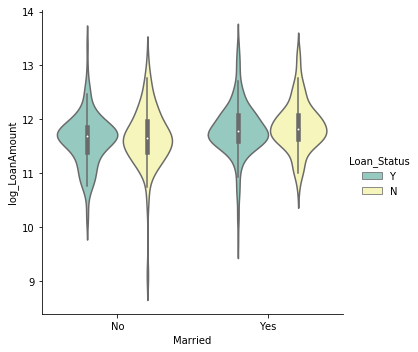

In [18]:
g = sns.catplot(x="Married", y="log_LoanAmount", hue="Loan_Status", data=train, kind="violin", palette="Set3")

It is noticeable that there _is not_ a big difference between the loan amount values for applicants that got accepted or rejected in any of the two "Married" subgroups. 

This implies that it is not the loan amount itself that creates the discrepancy of proportion rates we calculated above.

In fact, applicants who are married tend to ask for a _greater_ loan amount than those are not married.

However, what if married applicants tend to have higher income than those are not married? We've already seen that there is a positive correlation between the applicant's income and it's loan amount, which can also influence on the loan status decision.

According to the violin plot below, that is not the case. Applicants who are married and those who are not DO NOT have a relevant gap in their salaries.

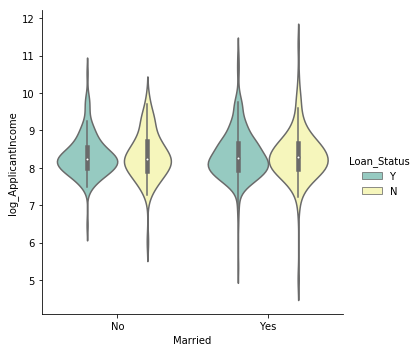

In [19]:
sns.catplot(x="Married", y="log_ApplicantIncome", hue="Loan_Status", data=train, kind="violin", palette="Set3")

Therefore, an applicant's _marital status_ **can be** a decisive factor for the company to either accept or reject someone's application.

### Dependents

Here we go to another categorical variable.

This time, however, it is not a binary one, but it actually subdivides the data into four groups based on the number of dependents the applicant has:
 1. 0 dependents
 2. 1 dependent
 3. 2 dependents
 4. 3+ dependents

This is how many applicants we have in each category:

In [20]:
train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

A quick overview of how this distribution occurs when we also analyse the applicant's income and loan amount is the scatter plot below.

I am not a big fan of this scatter plot though, as it is hard to see points in the plot that are being covered by other points. I am afraid it might give us an illusion that applicants who have 3+ dependents usually have a higher income than those who have none, for example.

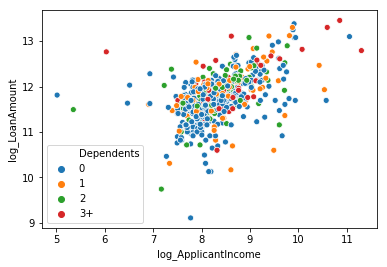

In [21]:
g = sns.scatterplot(x="log_ApplicantIncome", y="log_LoanAmount", hue="Dependents", data=train)

And let the violins play

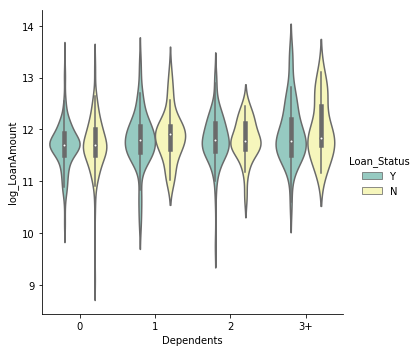

In [22]:
g = sns.catplot(x="Dependents", y="log_LoanAmount", data=train, kind="violin", hue="Loan_Status", palette="Set3")

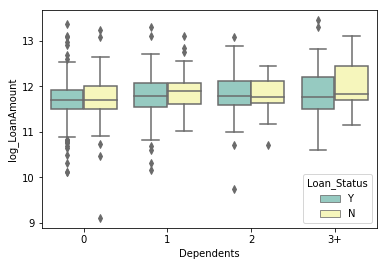

In [23]:
g = sns.boxplot(x="Dependents", y="log_LoanAmount", hue="Loan_Status", data=train, palette="Set3")

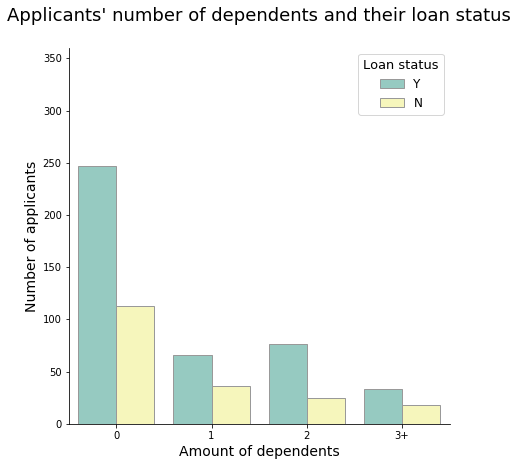

In [24]:
# Creates a Grouped barplot with the numbers of participants in different class standings and their origin
loan_status_dependents_count = sns.catplot(x='Dependents', hue='Loan_Status', kind="count",
                                            palette="Set3", edgecolor=".6", height=6,
                                            legend=False, data=train);

# Set the labels for the x and y axis, the legend and the title
plt.title("Applicants' number of dependents and their loan status\n", fontsize=18)
loan_status_dependents_count.set_xlabels('Amount of dependents', fontsize=14)
loan_status_dependents_count.set_ylabels('Number of applicants', fontsize=14)
plt.legend(title='Loan status', fontsize=12,title_fontsize=13)
plt.ylim(0,train.Dependents.value_counts().max());

It seems like applicants with 2 dependents have a greater approval rate than the other ones.
Let's see the proportions with a chunck of code below!

In [25]:
zero_approved = train[(train.Dependents == '0') &  (train.Loan_Status == 'Y')]
zero_denied = train[(train.Dependents == '0') &  (train.Loan_Status == 'N')]
one_approved = train[(train.Dependents == '1') &  (train.Loan_Status == 'Y')]
one_denied = train[(train.Dependents == '1') &  (train.Loan_Status == 'N')]
two_approved = train[(train.Dependents == '2') &  (train.Loan_Status == 'Y')]
two_denied = train[(train.Dependents == '2') &  (train.Loan_Status == 'N')]
three_plus_approved = train[(train.Dependents == '3+') &  (train.Loan_Status == 'Y')]
three_plus_denied = train[(train.Dependents == '3+') &  (train.Loan_Status == 'N')]

approved = [len(zero_approved.index), len(one_approved.index), len(two_approved.index), len(three_plus_approved.index)]
denied = [len(zero_denied.index), len(one_denied.index), len(two_denied.index), len(three_plus_denied.index)]

for i in range(len(approved)):
 print('The proportion of approved applicants with {} dependents is {}'.format(i, approved[i]/(approved[i]+denied[i])))

The proportion of approved applicants with 0 dependents is 0.6861111111111111
The proportion of approved applicants with 1 dependents is 0.6470588235294118
The proportion of approved applicants with 2 dependents is 0.7524752475247525
The proportion of approved applicants with 3 dependents is 0.6470588235294118


Indeed! It seems that having 2 dependents helps with the application aproval process.
On the other hand, having 1 or 3+ dependents is very much the same.
It is important to note, however, that we have about the same number of observations for '1' and '2' dependents, but only half of that for '3+', so we should not confirm any correlations here.

### Education

Another categorical variable, but this time with no missing values! YAY!

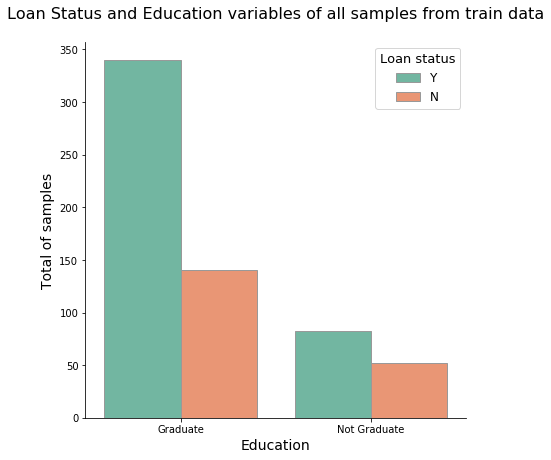

In [26]:
# Grouped barplot correlating Education and Loan_Status

loan_status_education_count = sns.catplot(x='Education', hue='Loan_Status', kind="count",
                                            palette="Set2", edgecolor=".6", height=6,
                                            legend=False, data=train);

# Set the labels for the x and y axis, the legend and the title
plt.title("Loan Status and Education variables of all samples from train data\n", fontsize=16)
loan_status_education_count.set_xlabels('Education', fontsize=14)
loan_status_education_count.set_ylabels('Total of samples', fontsize=14)
plt.legend(title='Loan status', fontsize=12,title_fontsize=13)

In [27]:
graduate_approved = train[(train.Education == 'Graduate') &  (train.Loan_Status == 'Y')]
graduate_denied = train[(train.Education == 'Graduate') &  (train.Loan_Status == 'N')]
notgraduate_approved = train[(train.Education == 'Not Graduate') &  (train.Loan_Status == 'Y')]
notgraduate_denied = train[(train.Education == 'Not Graduate') &  (train.Loan_Status == 'N')]

graduate_rate = (len(graduate_approved.index) / (len(graduate_approved.index) + len(graduate_denied.index)))
notgraduate_rate = (len(notgraduate_approved.index) / (len(notgraduate_approved.index) + len(notgraduate_denied.index)))

print('The proportion of approved graduated applicants is %.2f and that of non-graduated applicants is %.2f' % (graduate_rate, notgraduate_rate))

The proportion of approved graduated applicants is 0.71 and that of non-graduated applicants is 0.61


From the calculations above, we can see that **there might be a correlation** between the an applicant's academic degree and their loan status decision by the company. Applicants who have an academic degree show a greater rate of approval than those who do not have one.

Now let's take a look in how much applicants request in their loans to seek for a correlation between these values and their loan status decision by the company.

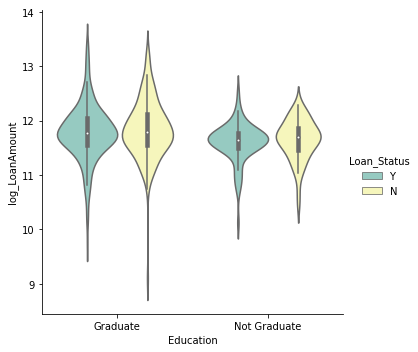

In [28]:
g = sns.catplot(x="Education", y="log_LoanAmount", hue="Loan_Status", data=train, kind="violin", palette="Set3")

It is noticeable that there _is not_ a big difference between the loan amount values for applicants that got accepted or rejected in any of the two "Education" subgroups. 

This implies that it is not the loan amount itself that creates the discrepancy of proportion rates we calculated above.

In fact, applicants who have an academic degree tend to ask for a _greater_ loan amount than those who do not.

However, what if graduate applicants tend to have higher income than those are not graduate? We've already seen that there is a positive correlation between the applicant's income and it's loan amount, which can also influence on the loan status decision.

According to the violin plot below, that is not the case. Applicants who are married and those who are not DO NOT have a relevant gap in their salaries.

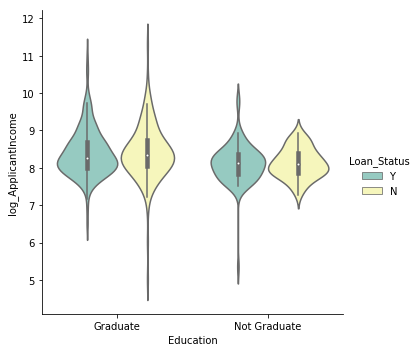

In [29]:
g = sns.catplot(x="Education", y="log_ApplicantIncome", hue="Loan_Status", data=train, kind="violin", palette="Set3")

Therefore, an applicant's _education_ **can be** a decisive factor for the company to either accept or reject someone's application.

### Self_Employed

This is another categorical variable with two possible values ('Yes'/'No'). However, life is not a bed of roses and, unlike the 'Education' variable, there are missing values in 'Self_Employed'. 32 to be more precise.

In [30]:
train.Self_Employed.isna().sum()

0

Besides, it is noticeable that a high percentage of all the aplicants are not self employed, that is, they work for someone else.

Note: The data description provided by Analytics Vidhya does not make clear if an applicant who claimed to be self employed truly works autonomously or is looking for a job, for example. So we will not make any assumptions regarding these possible situations.

In [31]:
train.Self_Employed.describe()

count     614
unique      2
top        No
freq      532
Name: Self_Employed, dtype: object

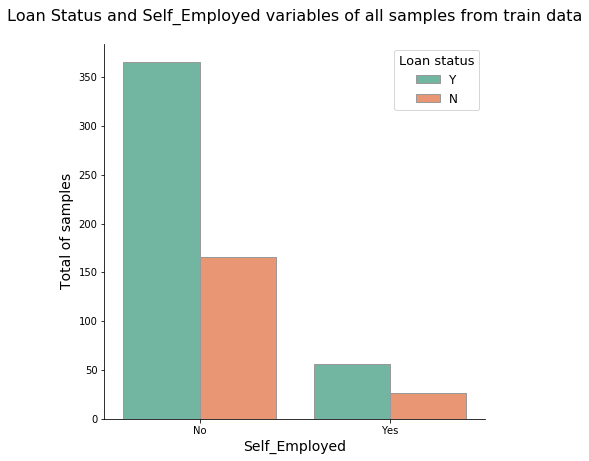

In [32]:
# Grouped barplot correlating Self_Employed and Loan_Status

loan_status_self_employed_count = sns.catplot(x='Self_Employed', hue='Loan_Status', kind="count",
                                            palette="Set2", edgecolor=".6", height=6,
                                            legend=False, data=train);

# Set the labels for the x and y axis, the legend and the title
plt.title("Loan Status and Self_Employed variables of all samples from train data\n", fontsize=16)
loan_status_self_employed_count.set_xlabels('Self_Employed', fontsize=14)
loan_status_self_employed_count.set_ylabels('Total of samples', fontsize=14)
plt.legend(title='Loan status', fontsize=12,title_fontsize=13)

In [33]:
self_employed_approved = train[(train.Self_Employed == 'Yes') &  (train.Loan_Status == 'Y')]
self_employed_denied = train[(train.Self_Employed == 'Yes') &  (train.Loan_Status == 'N')]
not_self_employed_approved = train[(train.Self_Employed == 'No') &  (train.Loan_Status == 'Y')]
not_self_employed_denied = train[(train.Self_Employed == 'No') &  (train.Loan_Status == 'N')]

self_employed_rate = (len(self_employed_approved.index) / (len(self_employed_approved.index) + len(self_employed_denied.index)))
not_self_employed_rate = (len(not_self_employed_approved.index) / (len(not_self_employed_approved.index) + len(not_self_employed_denied.index)))

print('The proportion of approved self-employed applicants is %.2f and that of non-self-employed applicants is %.2f' % (self_employed_rate, not_self_employed_rate))

The proportion of approved self-employed applicants is 0.68 and that of non-self-employed applicants is 0.69


The scatterplot below shows that most applicants are concentraded at about the same values for both self-employed and not self-employed, with a positive correlation between one's income and loan amount.

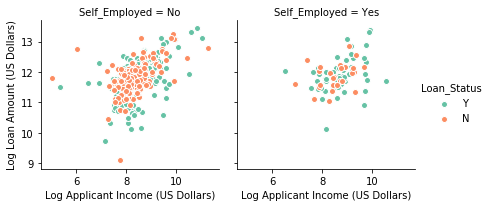

In [34]:
g = sns.FacetGrid(train, col="Self_Employed", hue="Loan_Status", palette="Set2")
g = g.map(plt.scatter, "log_ApplicantIncome", "log_LoanAmount", edgecolor="w").add_legend()
g.set_axis_labels("Log Applicant Income (US Dollars)", "Log Loan Amount (US Dollars)")

In [35]:
train['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

With the plot and the proportions presented above, we can see that the self-employment status of an applicant alone _does not_ seem to influence the company's decision to loan them money.

However, because we do not have much data on self-employed applicants , the analysis might not be very correct. This is a detail we shall pay more attention to in the future as we try to enhance our prediction model(s).

### Credit_History

In [36]:
# To make the data set more concise, let's transform the '1.0' values for the
#  'Credit_History' as a 'Yes' and the '0.0' values as a 'No' so to make it
#  a categorical variable.
train['Credit_History'] = train['Credit_History'].astype(object)
train['Credit_History'] = train['Credit_History'].replace([1, 0], ['Yes', 'No'])

# Quick look on the changes made
train['Credit_History'].head(10)

# OBS: We will later transform this variable back to a numerical one for the prediction models. I just think
# it looks nicer this way for data analysis and plotting.

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
5    Yes
6    Yes
7     No
8    Yes
9    Yes
Name: Credit_History, dtype: object

The definition given by Analytics Vidhya of this category is "credit history meets guidelines". We do not have further information on what these guidelines are or how an applicant's credit history is calculated, so let's just stick to the information we have, which is the "Yes/No" options.

In [37]:
train.Credit_History.value_counts()

Yes    525
No      89
Name: Credit_History, dtype: int64

The difference in applicants with a positive credit history to those with a negative one is massive, more than 5 times.

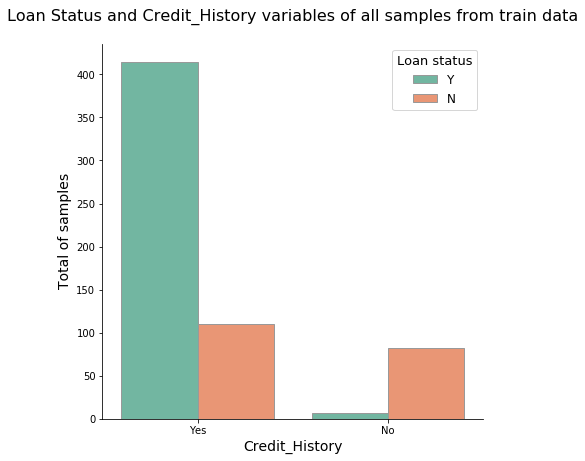

In [38]:
# Grouped barplot correlating Credit_History and Loan_Status

loan_status_credit_history_count = sns.catplot(x='Credit_History', hue='Loan_Status', kind="count",
                                            palette="Set2", edgecolor=".6", height=6,
                                            legend=False, data=train);

# Set the labels for the x and y axis, the legend and the title
plt.title("Loan Status and Credit_History variables of all samples from train data\n", fontsize=16)
loan_status_credit_history_count.set_xlabels('Credit_History', fontsize=14)
loan_status_credit_history_count.set_ylabels('Total of samples', fontsize=14)
plt.legend(title='Loan status', fontsize=12,title_fontsize=13)

In [39]:
positive_credit_history_approved = train[(train.Credit_History == 'Yes') &  (train.Loan_Status == 'Y')]
positive_credit_history_denied = train[(train.Credit_History == 'Yes') &  (train.Loan_Status == 'N')]
negative_credit_history_approved = train[(train.Credit_History == 'No') &  (train.Loan_Status == 'Y')]
negative_credit_history_denied = train[(train.Credit_History == 'No') &  (train.Loan_Status == 'N')]

positive_credit_history_rate = (len(positive_credit_history_approved.index) / (len(positive_credit_history_approved.index) + len(positive_credit_history_denied.index)))
negative_credit_history_rate = (len(negative_credit_history_approved.index) / (len(negative_credit_history_approved.index) + len(negative_credit_history_denied.index)))

print('The proportion of approved applicants with a positive credit history is %.2f and that of applicants with a    negative credit history is %.2f' % (positive_credit_history_rate, negative_credit_history_rate))

The proportion of approved applicants with a positive credit history is 0.79 and that of applicants with a    negative credit history is 0.08


Now this is very interesting.

There is a **_very strong_** correlation between an applicant's credit history status and the company's decision to loan this customer money or not.
It does make sense indeed as the company would probably not lend money to customers that do not meet its guidelines for getting a loan.

In order to automate the loan eligibility process, we should focus on identifying if a customer meets the guidelines or not. Leaving this field with unknown information will be disadvantageous for our task. This is a good follow-up idea to have with the company collecting the data about their applicants.

### Property_Area

In [40]:
train.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

We have a good amount of values for each of the 3 property area categories, without a big disparity of number of clients among them.

Besides, no NA values! :)

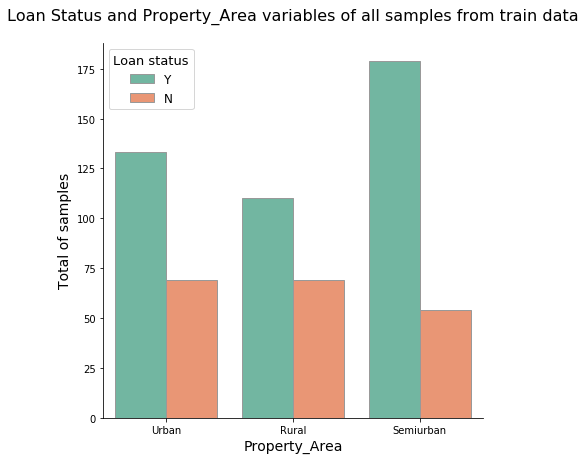

In [41]:
# Grouped barplot correlating Property_Area and Loan_Status

loan_status_property_area_count = sns.catplot(x='Property_Area', hue='Loan_Status', kind="count",
                                            palette="Set2", edgecolor=".6", height=6,
                                            legend=False, data=train);

# Set the labels for the x and y axis, the legend and the title
plt.title("Loan Status and Property_Area variables of all samples from train data\n", fontsize=16)
loan_status_property_area_count.set_xlabels('Property_Area', fontsize=14)
loan_status_property_area_count.set_ylabels('Total of samples', fontsize=14)
plt.legend(title='Loan status', fontsize=12,title_fontsize=13)

In [42]:
urban_approved = train[(train.Property_Area == 'Urban') &  (train.Loan_Status == 'Y')]
urban_denied = train[(train.Property_Area == 'Urban') &  (train.Loan_Status == 'N')]
rural_approved = train[(train.Property_Area == 'Rural') &  (train.Loan_Status == 'Y')]
rural_denied = train[(train.Property_Area == 'Rural') &  (train.Loan_Status == 'N')]
semiurban_approved = train[(train.Property_Area == 'Semiurban') &  (train.Loan_Status == 'Y')]
semiurban_denied = train[(train.Property_Area == 'Semiurban') &  (train.Loan_Status == 'N')]

urban_rate = (len(urban_approved.index) / (len(urban_approved.index) + len(urban_denied.index)))
rural_rate = (len(rural_approved.index) / (len(rural_approved.index) + len(rural_denied.index)))
semiurban_rate = (len(semiurban_approved.index) / (len(semiurban_approved.index) + len(semiurban_denied.index)))

print('The proportion for approved applicants from urban property areas is %.2f; that of applicants from rural areas is %.2f and that of applicants from semiurban areas is %.2f' % (urban_rate, rural_rate, semiurban_rate))

The proportion for approved applicants from urban property areas is 0.66; that of applicants from rural areas is 0.61 and that of applicants from semiurban areas is 0.77


After analysing the Credit_History variable and understanding how impactful it is on the loan decision model, let's see if there is a correlation between that information and an applicant's property area. Maybe that can give us further insight on the different rates of approval for the three different property area categories.

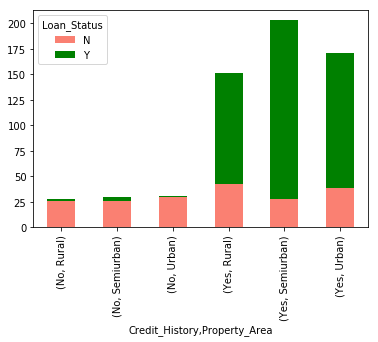

In [43]:
ax = pd.crosstab([train['Credit_History'], train['Property_Area']], train['Loan_Status'])
ax.plot(kind='bar', stacked=True, color=['salmon','green'], grid=False)

In [44]:
contingency_table = pd.crosstab(
    train['Credit_History'],
    train['Property_Area'],
    margins=True,
)
contingency_table

Property_Area,Rural,Semiurban,Urban,All
Credit_History,,,,
No,28,30,31,89
Yes,151,203,171,525
All,179,233,202,614


As we can see, a huge percentage of applicants who had a negative credit history also did not get their loan request approved. Their property area does not have to seem a big influence on this.

On the other hand, applicants who had a positive credit history experienced different outcomes. Those from semiurban areas had a higher approval rate than those from urban or rural areas.

Therefore, the location of one's property _can be_ an important factor on the company's decision to approve or decline a loan request. The applicant's credit history situation seems to be the most important factor nevertheless.

# Building a Predictive Model

From the variables analysed, some of them show a strong correlation with our target variable 'Loan_Status'. 

The ones we will use in our prediction models are:
 - **Credit_History**
 - Married
 - Education
 - Property_Area
 
 - _Dependents_ (I am interested to see how this variable will affect the prediction models)
 
 - _Self_ _ _Employed_ (Maybe some further analysis is necessary. I might use it to enhance the models afterwards)

Before we build the models, it is important to mention that the scikit-learn library requires all inputs to be numeric, so we should convert all our categorical variables into numeric by encoding the categories.

This is the current scenario:

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender                   614 non-null object
Married                  614 non-null object
Dependents               614 non-null object
Education                614 non-null object
Self_Employed            614 non-null object
Loan_Amount_Term         614 non-null float64
Credit_History           614 non-null object
Property_Area            614 non-null object
Loan_Status              614 non-null object
log_LoanAmount           614 non-null float64
log_ApplicantIncome      614 non-null float64
log_CoapplicantIncome    614 non-null float64
dtypes: float64(4), object(8)
memory usage: 57.6+ KB


For our statistical methods and in order to save memory, we shall convert our 'object' variables (a.k.a strings) into the 'category' data type.

In [46]:
# Converting all 'object' variables to 'category' data type
train = pd.concat([
        train.select_dtypes([], ['object']),
        train.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')
        ], axis=1).reindex_axis(train.columns, axis=1)

train.info()

# Source: https://stackoverflow.com/questions/39904889/pandas-cast-all-object-columns-to-category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender                   614 non-null category
Married                  614 non-null category
Dependents               614 non-null category
Education                614 non-null category
Self_Employed            614 non-null category
Loan_Amount_Term         614 non-null float64
Credit_History           614 non-null category
Property_Area            614 non-null category
Loan_Status              614 non-null category
log_LoanAmount           614 non-null float64
log_ApplicantIncome      614 non-null float64
log_CoapplicantIncome    614 non-null float64
dtypes: category(8), float64(4)
memory usage: 24.9 KB


Two ways of transforming these categorical variables into numerical ones is by using _LabelEncoder_ or _OneHotEncoder_. In this case, using LabelEncoder is not a good choice, since it brings in a natural ordering for different classes. 

For example, the 'Property_Area' variable would have its values transformed into three options (0, 1, 2), where 1 would be greater than 0, and 2 greater than 1 and also greater than 0. However, we do not want any kind of ordering to occur within our dataset.

Therefore, OneHotEncoder is the best option here. One Hot Encoder transforms the feature into several pseudo-labels or dummy features as many as the unique number of categories for that feature and for every row, a 1 is assigned for the feature representing that row’s category and rest of the features are marked 0. Something like this — [0,0,1,0,0]. [Source](https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159)

Let's use the popular Pandas function **get_dummies()** for this purpose.

In [47]:
# Dummy Variables for all categorical columns. When drop_first is set as True, 
# it gives k-1 dummies out of k categorical levels by removing the first level.

# Select the categorical variables from the dataframe
categories = train.select_dtypes(include='category').columns

train_dummies = pd.get_dummies(train, columns=categories, drop_first=True)
train_dummies.head(7)

,Loan_Amount_Term,log_LoanAmount,log_ApplicantIncome,log_CoapplicantIncome,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,360.0,11.695255,8.674197,0.000000,1,0,0,0,0,0,0,1,0,1,1
1,360.0,11.759793,8.430327,7.319202,1,1,1,0,0,0,0,1,0,0,0
2,360.0,11.097425,8.006701,0.000000,1,1,0,0,0,0,1,1,0,1,1
3,360.0,11.695255,7.857094,7.765993,1,1,0,0,0,1,0,1,0,1,1
4,360.0,11.856522,8.699681,0.000000,1,0,0,0,0,0,0,1,0,1,1
5,360.0,12.495008,8.597482,8.342125,1,1,0,1,0,0,1,1,0,1,1
6,360.0,11.461643,7.755339,7.324490,1,1,0,0,0,1,0,1,0,1,1


In [48]:
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
Loan_Amount_Term           614 non-null float64
log_LoanAmount             614 non-null float64
log_ApplicantIncome        614 non-null float64
log_CoapplicantIncome      614 non-null float64
Gender_Male                614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Dependents_3+              614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Credit_History_Yes         614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
Loan_Status_Y              614 non-null uint8
dtypes: float64(4), uint8(11)
memory usage: 25.9 KB


We have barely increased the memory usage and the number of total variables in the dataframe (1 more KB and 3 more variables), which is great for the analysis!

Onto the next step, let's separate the variables we will use and the target one as well.

In [49]:
# The 8 variables selected to be used in the model
X = train_dummies[['Credit_History_Yes', 'Married_Yes', 'Education_Not Graduate', 'Property_Area_Semiurban',
                   'Property_Area_Urban','Dependents_1', 'Dependents_2', 'Dependents_3+']]
# The target variable
y = train_dummies['Loan_Status_Y']

## Train/Test Split

![](https://miro.medium.com/max/1136/1*-8_kogvwmL1H6ooN1A1tsQ.png)

Tthe data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

_Source: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6_

In [50]:
from sklearn.model_selection import train_test_split

# Create training and testing variables

# 80% of all the data will be used for training the model, while the other 20% for testing it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(491, 8) (491,)
(123, 8) (123,)


**However**, as Adi Bronshtein wrote in his article about ["Train/Test split and cross validation in Python"](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)
 > _"But train/test split does have its dangers — what if the split we make isn’t random?"_
 
 What if one subset of our data has only people with the same number of dependents, only applicants with positive credit history record, or maybe only those who are married? This will result in overfitting, even though we’re trying to avoid it as much as we can.
 
This is where **cross validation** comes in.

## Cross Validation



![](https://miro.medium.com/max/948/1*4G__SV580CxFj78o9yUXuQ.png)

What happens with Cross Validation is that we _split_ our data into k subsets, and _train_ on k-1 one of those subset. We then hold the last subset for test.

I decided to implement the **K-Folds cross-validator (CV)** algorithm. We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set. 

> K-Fold CV is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point. Lets take the scenario of 5-Fold cross validation(K=5). Here, the data set is split into 5 folds. In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.
> [Source](https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833)

![Visual representation of K-Folds](https://miro.medium.com/max/1509/1*IjKy-Zc9zVOHFzMw2GXaQw.png)


Another option was to use the **LeaveOneOut (LOO algorithm)** In this type of cross validation, the number of folds (subsets) equals to the number of observations (n) we have in the dataset. We then average n-1 of these folds, and build our model with this average. We then test the model against the last fold.  Because we would get a big number of training sets (equals to the number of samples), this method is very computationally expensive. According to some research I did, most people prefer / recommend the usage of KFold with K being equal to 5 or 10 than using LOO.

# CLASSIFIERS

FINALLY! Let's get down to business! 

First, let's apply Logistic Regression to our data. I want to compare the results of doing it to both the datasets generated from these two methods:
 1. Train/Test split
 2. Cross Validation (KFold)
 
We shall consider not only the accuracy score from both methods, but also any other scores or metrics that might be relevant for our analysis.

### Logistic Regression (with Train/Test split)

Train accuracy score: 0.7983706720977597
Test accuracy score: 0.8536585365853658

TN: 63, FP: 92, FN: 7, TP: 329


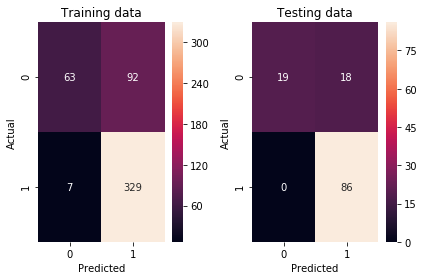

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_train)
print('Train accuracy score:',accuracy_score(y_train, y_pred))
print('Test accuracy score:', accuracy_score(y_test, logreg.predict(X_test)))

# Compute confusion matrix to evaluate the accuracy of a classification
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel() # ravel() returns a 1-D array, containing the elements of the input, is returned
print("\nTN: %d, FP: %d, FN: %d, TP: %d" % (tn, fp, fn, tp))

# 3 rows, 2 columns, 1st graph (and so on)...
plt.subplot(1, 2, 1)
confusion_matrix_train = pd.crosstab(y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_train, annot=True, fmt='d')
plt.title('Training data')

plt.subplot(1, 2, 2)
confusion_matrix_test = pd.crosstab(y_test, logreg.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_test, annot=True, fmt='d')
plt.title('Testing data')

plt.tight_layout()

### Precision

![Precision metric](https://miro.medium.com/max/444/1*C3ctNdO0mde9fa1PFsCVqA.png)

> Immediately, you can see that Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive. _[Source](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)_

Precision is a good measure to be calculated when the costs of False Positive is high, which is our case. It is very prejudicial for the company we are developing this model for to have many False Positive values, as we are telling them to loan money to certain applicants that, in reality, should be denied the loan! **Therefore, having a good precision score is very important in our case.**

In [52]:
print('\nTrain Precision score:', precision_score(y_train, y_pred, average='macro'))
print('Test Precision score', precision_score(y_test, logreg.predict(X_test), average='macro'))


Train Precision score: 0.8407363420427554
Test Precision score 0.9134615384615384


### Logistic Regression (with Cross Evaluation)

In [53]:
from sklearn.model_selection import cross_val_score, cross_val_predict
# Make a scorer from a performance metric or loss function
from sklearn.metrics import make_scorer

# Perform 5-fold cross validation
scores = cross_val_score(logreg, X, y, cv=5)
print(scores)

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f) or simply %f\n" % (scores.mean(), scores.std() * 2, scores.mean()))


# Perform 5-fold cross validation and calculates the Precision score
prec_scores = cross_val_score(logreg, X, y, scoring=make_scorer(precision_score, average='macro'), cv=5)
print(prec_scores)

# The mean score and the 95% confidence interval of the precision score estimate are hence given by:
print("Precision: %0.2f (+/- %0.2f) or simply %f" % (prec_scores.mean(), prec_scores.std() * 2, prec_scores.mean()))

[0.81451613 0.76612903 0.78688525 0.86065574 0.81967213]
Accuracy: 0.81 (+/- 0.06) or simply 0.809572

[0.86844864 0.80584416 0.82429245 0.89745279 0.87126068]
Precision: 0.85 (+/- 0.07) or simply 0.853460


Results:
1. Train/Test split:
 - Accuracy:  0.780488
 - Precision: 0.816288


2. Cross Validation:
 - Accuracy:  0.809572
 - Precision: 0.853460
 
As we can see, in this Logistic Regression model, Cross Validation got better scores for *both* accuracy and precision scoring metrics. I chose to keep using the Cross Validation method for the following classification algorithms as it seems to give better results then the train/test splitting method.

### RandomForest Classifier

THE FOLLOWING CELLS ARE SOME IDEAS YET TO BE WORKED ON - - - PLEASE IGNORE THEM FOR NOW

### CREATE A 'TotalIncome' variable in the beginning then analyse it here

Heatmap

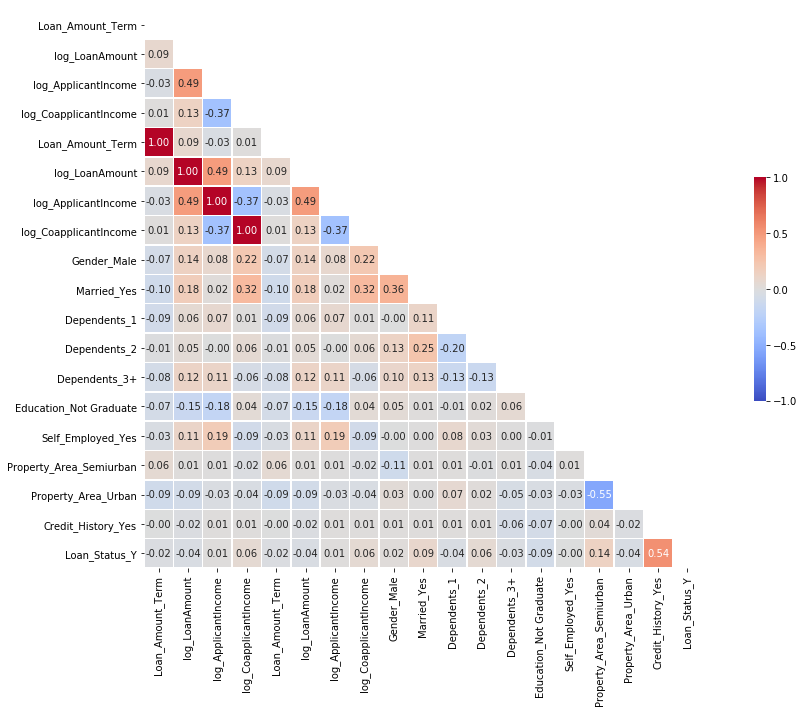

In [54]:
# Heatmap correlation matrix between all variables using Pearson's corr coefficient
train_dummy = pd.get_dummies(train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status'], drop_first=True)
train_concat = pd.concat([train, train_dummy], axis = 1)
#train_concat.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1, inplace=True)
corr_matrix = train_concat.corr()

# Set up mask to hide the upper triangle (same information as the bottom one)
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

# Setup
fig, ax = plt.subplots(figsize=(15, 10))

# vmin and vmax control the range of the colormap
sns.heatmap(corr_matrix, mask=mask, square=True, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5,
            cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]}, # Shrink the legend size and label tick marks at [-1, -.5, 0, 0.5, 1]
            vmin=-1, vmax=1) # Set min and max values for the color bar

# Rotates the column labes for the x-axis to make it more presentable
ax.set_xticklabels(corr_matrix.columns, rotation = 90)
ax.set_yticklabels(corr_matrix.columns)

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()

# corr_matrix

# Source: https://towardsdatascience.com/annotated-heatmaps-in-5-simple-steps-cc2a0660a27d